In [32]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree

from sklearn.metrics import classification_report

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from mpl_toolkits import mplot3d
from sklearn.decomposition import PCA
# from kneed import KneeLocator

import re

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
df=pd.read_excel(r'C:\Users\id_anm\OneDrive - BTG Group\Documents\Python File\Data Penjualan fintecth abc.xlsx')

In [3]:
df.head()

,User ID,Order ID,Date Applied,Status,University,Year,Type of Product,Ecom,Purchase,Voucher Code,Price,DP,Installment,Time Period,Total Interest,H
0,ID3887926535,ID9009548356,2021-01-01 00:00:00,rejected,Universitas Brawijaya - Malang,2015,BARANG,tokopedia,INFINIX HOT 9 PLAY 4/64,NaN,1643888,164389,165926,12,511613,NaN
1,ID2933497385,ID6943014286,2021-01-01 00:00:00,approved,Institut Teknologi Sepuluh Nopember (ITS),2018,BARANG,tokopedia,GOPRO HERO 8 BLACK BUNDLE,NaN,5549000,3856530,200000,12,707530,NaN
2,ID3560325924,ID9967181294,2021-01-01 00:00:00,rejected,Universitas Muhammadiyah Malang (UMM),2018,BARANG,tokopedia,XIAOMI REDMI NOTE 9 PRO,NaN,3539000,550000,327598,12,942176,NaN
3,ID3560325924,ID0299851630,2021-01-01 00:00:00,approved,Universitas Muhammadiyah Malang (UMM),2018,PULSA,NaN,"TELKOMSEL RP 100,000",NaN,98147,0,100001,1,1854,NaN
4,ID3560325924,ID6277673608,2021-01-01 00:00:00,approved,Universitas Muhammadiyah Malang (UMM),2018,PULSA,NaN,"TELKOMSEL RP 100,000",NaN,98147,0,100001,1,1854,NaN


In [4]:
df.tail(3)

,User ID,Order ID,Date Applied,Status,University,Year,Type of Product,Ecom,Purchase,Voucher Code,Price,DP,Installment,Time Period,Total Interest,H
4443,ID9446582467,ID2101977098,2021-07-31 00:00:00,rejected,Universitas Airlangga (UNAIR),2019,BARANG,tokopedia,IPHONE 12 PRO 128GB -,APX50,15800000,6320000,793939,17,4016963,NaN
4444,ID2816155652,ID5751106708,2021-07-31 00:00:00,rejected,Universitas Islam Negeri Sayyid Ali Rahmatulla...,2020,BARANG,tokopedia,POCO M3 6/128GB - MI,MIE50,2275000,227500,226507,3,-1367979,NaN
4445,user_id,order_id,date_applied,status,university,start_year,product,ecom,purchase,voucher_code,price,downpayment,installment,time_period,Keuntungan,NaN


In [5]:
# DATA CLEANSING

In [6]:
#Drop some column that is not neccessary and column H as it it blank
df.drop(columns={'User ID','Order ID','Date Applied','University','Year','Purchase','Voucher Code','H', 'Total Interest'}, inplace=True) 

In [7]:
df.drop(labels=4445, axis=0, inplace=True)

In [8]:
#Check if there is any null
df.isnull().sum()

Status                0
Type of Product       0
Ecom               1336
Price                 0
DP                    0
Installment           0
Time Period           0
dtype: int64

In [9]:
#Fill missing value in Ecom
mask=df['Ecom'].isnull()
df.loc[mask, 'Ecom'] = df.loc[mask, 'Type of Product'].map({'UANG KULIAH':'NOT Ecom','PULSA':'NOT Ecom','BARANG':'Other Ecom'})


In [10]:
# EDA

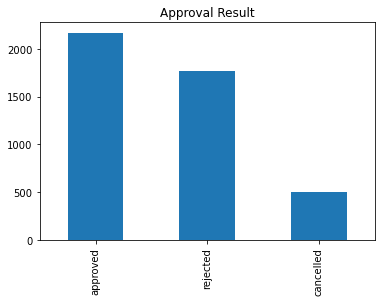

In [11]:
#Approval Result Comparison

df['Status'].value_counts().plot(kind='bar')
plt.title("Approval Result")
plt.show()

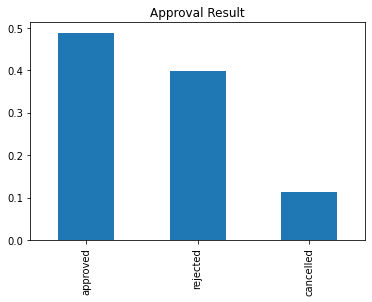

In [12]:
df['Status'].value_counts(True).plot(kind='bar')
plt.title("Approval Result")
plt.show()

In [13]:
# Cancelled data will not be used for machine learning as it is cancelled by user and can not be analyzed
# approved data and rejected data distribution seems balanced 

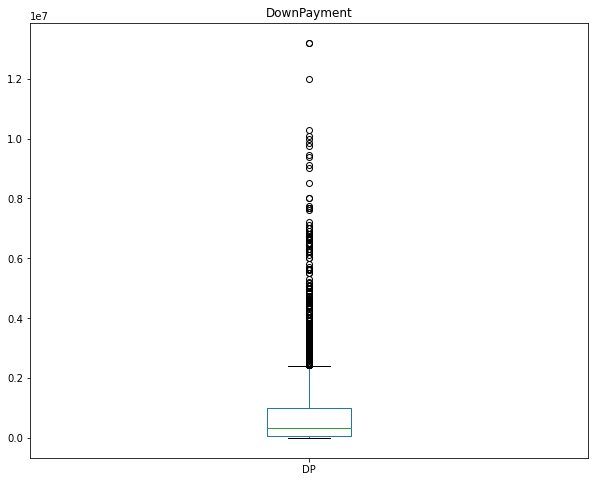

In [14]:
df['DP'].plot(kind='box',figsize=(10,8))
plt.title("DownPayment")
plt.show()

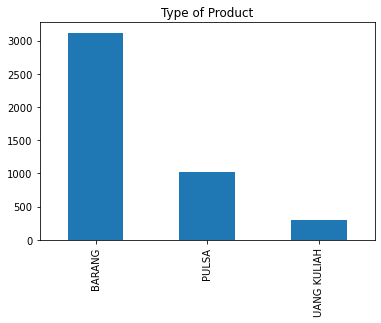

In [15]:
#Type of Product Comparison

df['Type of Product'].value_counts().plot(kind='bar')
plt.title("Type of Product")
plt.show()

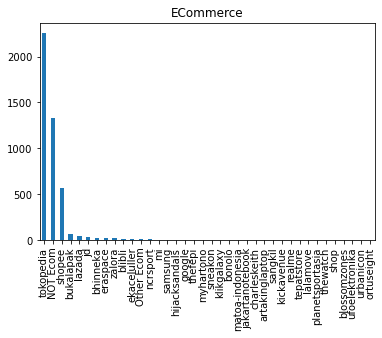

In [16]:
#E-Commerce Comparison

df['Ecom'].value_counts().plot(kind='bar')
plt.title("ECommerce")
plt.show()

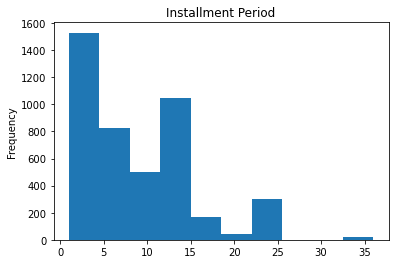

In [17]:
df['Time Period'].plot(kind='hist')
plt.title("Installment Period")
plt.show()

In [18]:
##### Preprocessing Data for ML

In [19]:
#Create a copy of dataframe for machine learning
df_kmeans=df

In [20]:
df_kmeans.head()

,Status,Type of Product,Ecom,Price,DP,Installment,Time Period
0,rejected,BARANG,tokopedia,1643888,164389,165926,12
1,approved,BARANG,tokopedia,5549000,3856530,200000,12
2,rejected,BARANG,tokopedia,3539000,550000,327598,12
3,approved,PULSA,NOT Ecom,98147,0,100001,1
4,approved,PULSA,NOT Ecom,98147,0,100001,1


In [21]:
#Check Each Item in Type of Product >> Target expected outcomes
df_kmeans['Status'].value_counts()

approved     2170
rejected     1773
cancelled     502
Name: Status, dtype: int64

In [22]:
# Drop Rows that has 'Cancelled' in status column. cancelled means the approval process is canceled by users,thus its not relevent to analyze
df_kmeans = df_kmeans[df_kmeans.Status != 'cancelled']

In [23]:
#Check Each Item in Type of Product
df_kmeans['Type of Product'].value_counts()

BARANG         2665
PULSA          1023
UANG KULIAH     255
Name: Type of Product, dtype: int64

In [24]:
#Check Each Item in Ecom and drop rows that only occure less than 10 times
Ecom_counts = df_kmeans[['Ecom', 'Type of Product']]
df_kmeans= df_kmeans[Ecom_counts.replace(Ecom_counts.apply(pd.Series.value_counts)).gt(10).all(1)]
df_kmeans['Ecom'].value_counts()

tokopedia    1925
NOT Ecom     1278
shopee        484
bukalapak      55
lazada         42
jd             29
bhinneka       21
eraspace       17
zalora         15
blibli         14
Name: Ecom, dtype: int64

In [25]:
# assign new value for BARANG = 1, PULSA=2 and UANG KULIAH =3 (OR can use label encoder for better)

df_kmeans["Type of Product"].replace({"BARANG": 1 , "PULSA": 2, "UANG KULIAH":3}, regex=True, inplace=True)

In [26]:
# assign new value for tokopedia=1, NOT Ecom=2, shopee=3, bukalapak=4, lazada=5, jd=6, bhinneka=7, eraspace=8, zalora=9, blibli=10

df_kmeans["Ecom"].replace({"tokopedia": 1 , "NOT Ecom": 2, "shopee" : 3, "bukalapak" : 4, "lazada":5,
                       "jd" :6, "bhinneka":7, "eraspace" : 8, "zalora":9, "blibli":10}, regex=True, inplace=True)


In [27]:
# assign new value for approved = 1, rejected=0

df_kmeans["Status"].replace({"approved": 1 , "rejected": 0}, regex=True, inplace=True)

In [28]:
# Change Dataset to float type
# df_kmeans['Status'] = df_kmeans['Status'].astype('float')
df_kmeans['Price'] = df_kmeans['Price'].astype('float')
df_kmeans['DP'] = df_kmeans['DP'].astype('float')
df_kmeans['Installment'] = df_kmeans['Installment'].astype('float')
df_kmeans['Time Period'] = df_kmeans['Time Period'].astype('float')

In [29]:
df_kmeans.head()

,Status,Type of Product,Ecom,Price,DP,Installment,Time Period
0,0,1,1,1643888.0,164389.0,165926.0,12.0
1,1,1,1,5549000.0,3856530.0,200000.0,12.0
2,0,1,1,3539000.0,550000.0,327598.0,12.0
3,1,2,2,98147.0,0.0,100001.0,1.0
4,1,2,2,98147.0,0.0,100001.0,1.0


In [30]:
# Method to calculate the correlation matrix for all of the numerical columns
# default is pearson correlation
df_corr = df_kmeans.corr()
df_corr

,Status,Type of Product,Ecom,Price,DP,Installment,Time Period
Status,1.000000,0.261442,0.051479,-0.436367,-0.232808,-0.335332,-0.483611
Type of Product,0.261442,1.000000,0.088553,-0.223654,-0.204963,-0.110701,-0.433385
Ecom,0.051479,0.088553,1.000000,-0.160390,-0.157409,-0.116255,-0.076581
Price,-0.436367,-0.223654,-0.160390,1.000000,0.841389,0.692221,0.520724
DP,-0.232808,-0.204963,-0.157409,0.841389,1.000000,0.531208,0.298819
Installment,-0.335332,-0.110701,-0.116255,0.692221,0.531208,1.000000,0.091606
Time Period,-0.483611,-0.433385,-0.076581,0.520724,0.298819,0.091606,1.000000


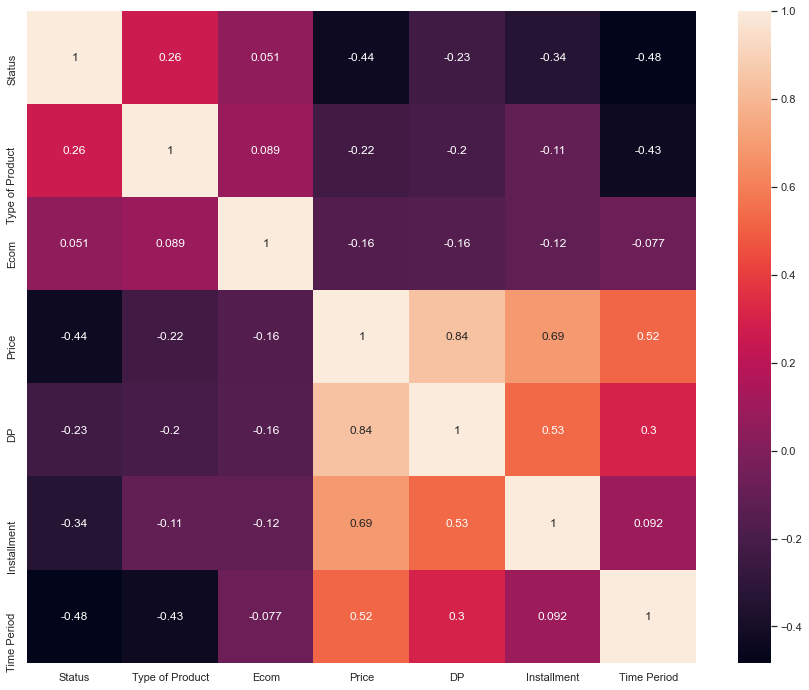

In [33]:
fig, ax = plt.subplots(figsize=(15, 12))
ax = sns.heatmap(df_corr, annot=True)

In [34]:
##### Train Test Split ####

In [35]:
#Train
df_train,df_test = train_test_split(df_kmeans,test_size=0.2,random_state=123)

In [36]:
X_train = df_train.drop(columns='Status')
y_train = df_train['Status']

In [37]:
X_test = df_test.drop(columns='Status')
y_test = df_test['Status']

In [38]:
##### Decision Tree ####

In [39]:
# Initiate the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=123,
                             criterion='entropy',
                             max_depth = 5)

In [40]:
# Train the model on training data
model = clf.fit(X_train, y_train)

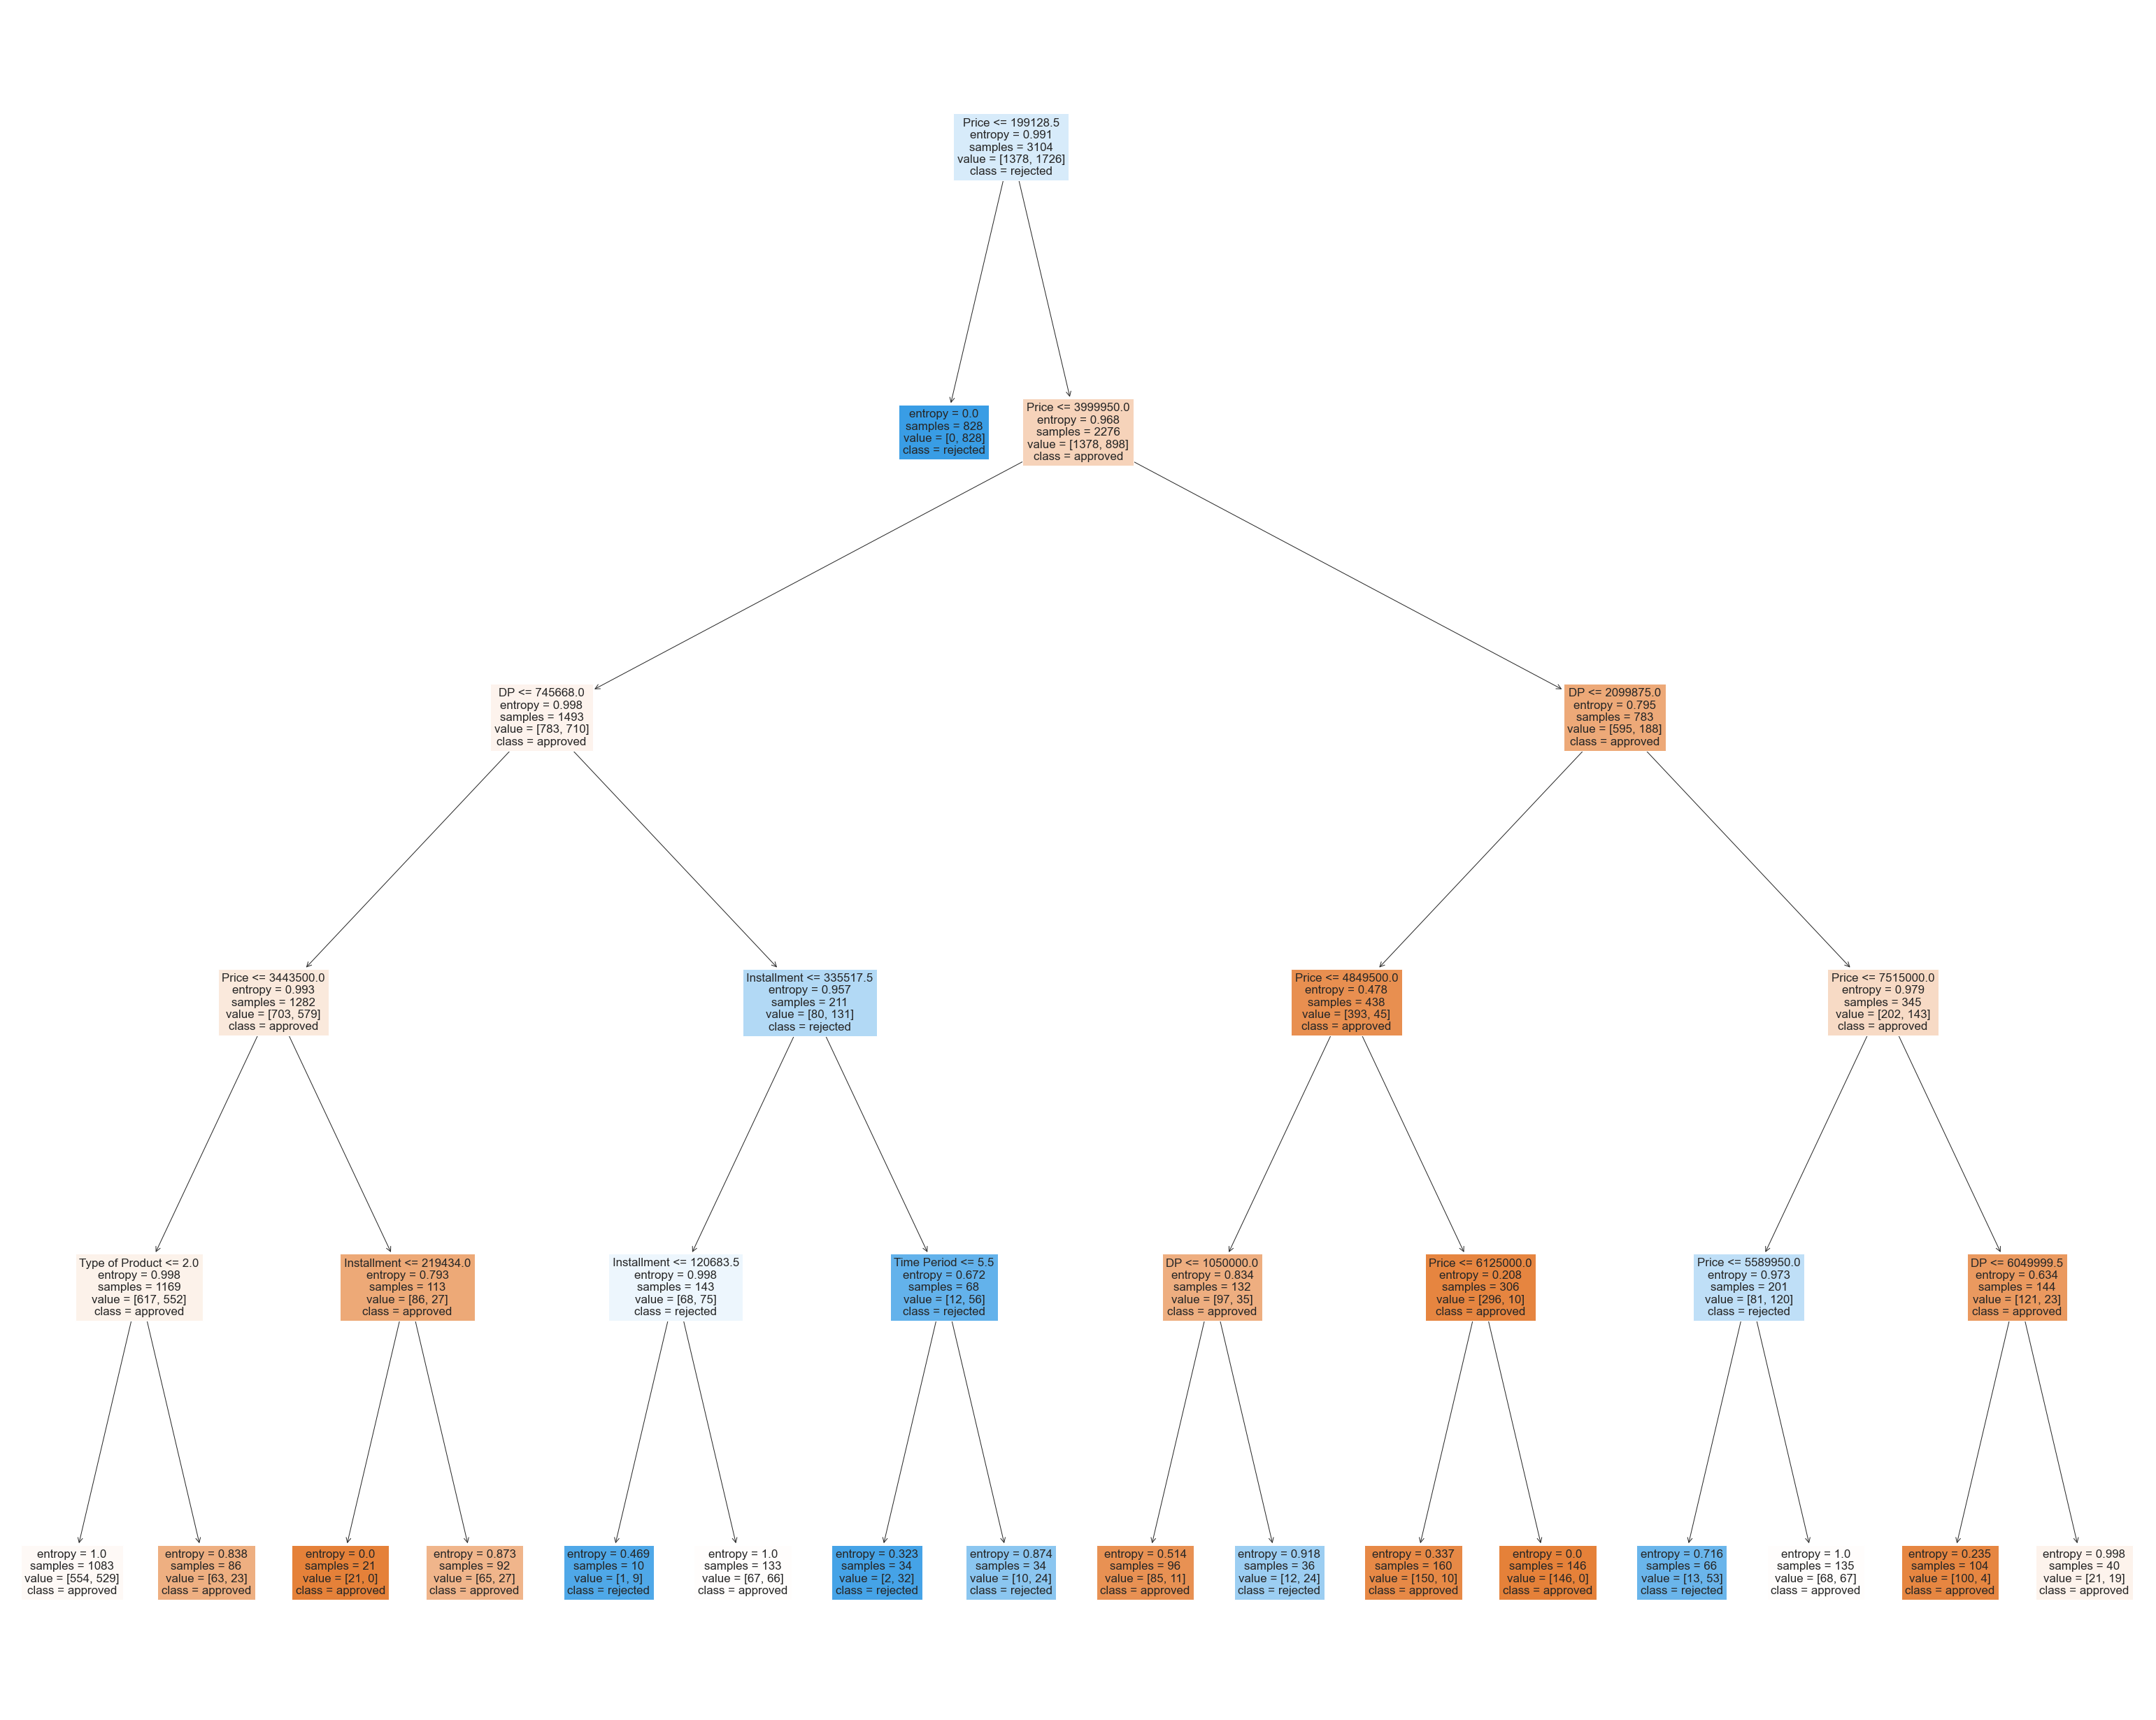

In [41]:
# Visualize the Decision Tree
fig = plt.figure(figsize=(55,45))
_ = tree.plot_tree(clf, 
                   feature_names=X_train.columns,
                   class_names=['approved','rejected'],
                   filled=True)

In [42]:
#Test Model
X_test = df_train.drop(columns={'Status'})
y_test = df_train['Status']

In [43]:
# Test the model performance on testing data
clf.score(X_test, y_test) #method to calculate mean accuracy

0.7442010309278351

In [46]:
# Performance Matrix

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred, target_names=['approved','rejected']))

              precision    recall  f1-score   support

    approved       0.64      0.97      0.77      1378
    rejected       0.96      0.56      0.71      1726

    accuracy                           0.74      3104
   macro avg       0.80      0.77      0.74      3104
weighted avg       0.82      0.74      0.74      3104



In [47]:
##### KMeans ####

In [48]:
# Using Code from Training
def elbow_plot_kmeans(X,kmax,step=1):
  '''
  Function for K-Means elbow plot
  
  kmax is maximum number of k
  step is looping step for testing kmeans
  '''  
  WCSS=[]
  for i in range(1,kmax,step):
    kmeans=KMeans(n_clusters=i,random_state=123,verbose=False)
    kmeans.fit(X)
    WCSS.append(kmeans.inertia_)
    
  plt.plot(range(1,kmax,step),WCSS,marker='o')
  plt.title('Elbow Method')
  plt.xlabel('Number of Clusters')
  plt.ylabel('Total Distance')
  plt.xlim([0,kmax])
  plt.show()

In [49]:
def plot_kmeans(X,k):
  '''
  Function for visualizing K-Means Results
  '''

  kmeans = KMeans(n_clusters=k ,random_state=123,verbose=False)
  y = kmeans.fit(X)

  if X.shape[1] > 2: 
    if X.shape[1] == 3:
      df_pca = X.copy()
    else:
      # Apply Principal Component Analysis for Visualization Purpose
      pca = PCA(n_components=3)
      df_pca = pca.fit_transform(X)
      df_pca = pd.DataFrame(df_pca,columns=['pca_1','pca_2','pca_3'])
      
    fig=plt.figure(figsize=(12,8))
    ax=plt.axes(projection="3d")
    scatter=ax.scatter3D(df_pca.iloc[:,0],df_pca.iloc[:,1],df_pca.iloc[:,2],c=y.labels_)
    plt.colorbar(scatter)
    plt.title(str(k)+'-Means Clustering')
    plt.show()
  else:
    scatter=plt.scatter(X,c=y.labels_)
    plt.xlabel(columns[0])
    plt.ylabel(columns[1])
    plt.title(str(k)+'-Means Clustering')
    plt.show()

In [50]:
#  Normalize all of the features 

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

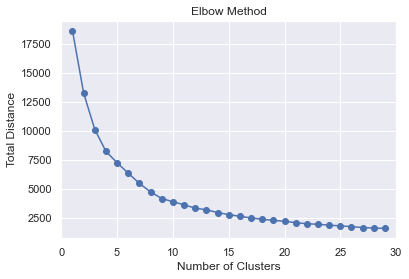

In [51]:
elbow_plot_kmeans(X_train_scaled,kmax=30)

In [52]:
# I'm trying to use kneelocator but not successful
#kl = KneeLocator(range(1, 30), WCSS, curve="convex", direction="decreasing")

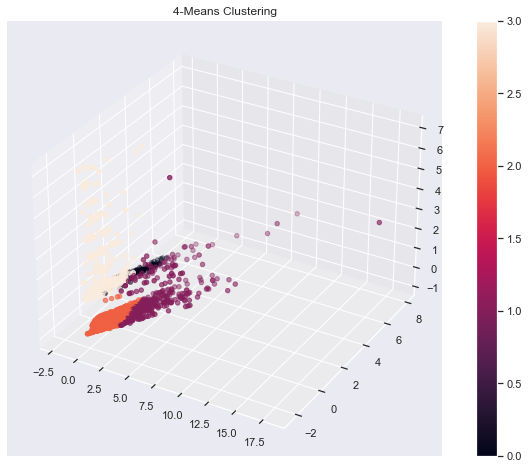

In [56]:
plot_kmeans(X_train_scaled,k=4)

In [57]:
##### Try to Add Segmentation from Kmeans to Decision Tree ####

In [58]:
kmeans = KMeans(n_clusters=4 ,random_state=123,verbose=False)
kmeans.fit(X_train_scaled)

segment_train = kmeans.predict(X_train_scaled)
segment_test = kmeans.predict(X_test_scaled)

In [59]:
X_train_segmented = X_train.copy()
X_train_segmented['segment'] = segment_train

X_test_segmented = X_test.copy()
X_test_segmented['segment'] = segment_test

In [60]:
# Initiate the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=123,
                             criterion='entropy',
                             max_depth = 5)

In [61]:
# Train the model on training data
model = clf.fit(X_train_segmented, y_train)

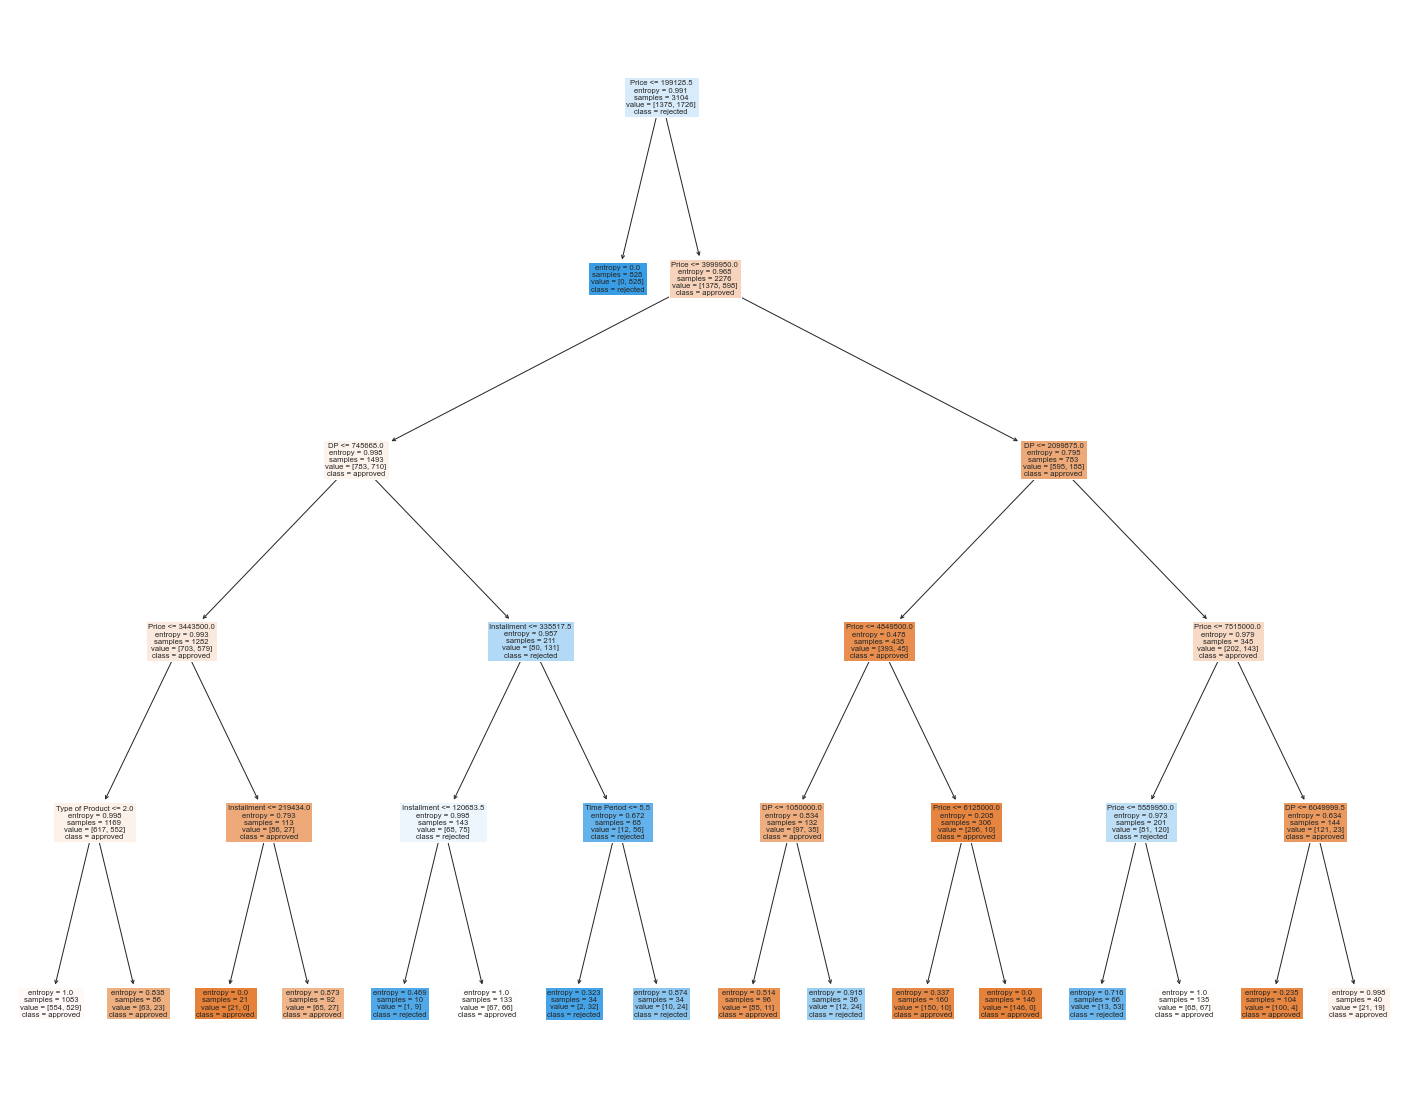

In [62]:
# Visualize the Decision Tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=X_train_segmented.columns,
                   class_names=['approved','rejected'],
                   filled=True)

In [63]:
# Test the model performance on testing data
clf.score(X_test_segmented, y_test) #method to calculate mean accuracy

0.7442010309278351

In [64]:
# performance matrix

y_pred = clf.predict(X_test_segmented)

print(classification_report(y_test, y_pred, target_names=['approved','rejected']))

              precision    recall  f1-score   support

    approved       0.64      0.97      0.77      1378
    rejected       0.96      0.56      0.71      1726

    accuracy                           0.74      3104
   macro avg       0.80      0.77      0.74      3104
weighted avg       0.82      0.74      0.74      3104

